Start calculating program Developed by J.H. Lee
Data saved as data_0224102618.csv


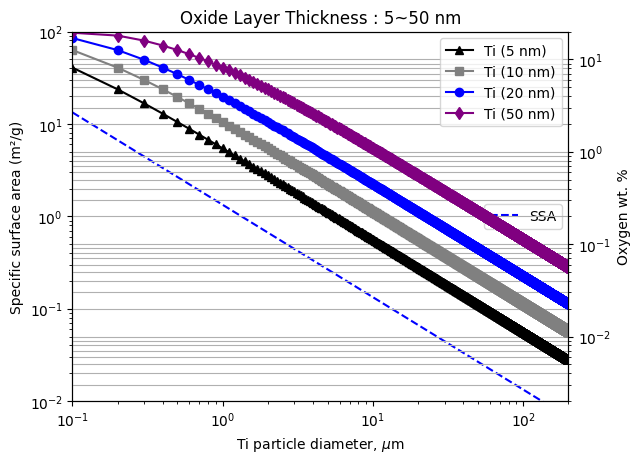

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import datetime

print("Start calculating program Developed by J.H. Lee")

dt_now = datetime.datetime.now()
time = dt_now.strftime("%m%d%H%M%S")


Tiden, TiOden = 4.506, 4.23
Zrden, ZrOden = 6.52, 5.68
Hfden, HfOden = 13.31, 9.68
Tiatom, Zratom, Hfatom, Oatom = 47.867, 91.224, 178.48, 15.9994

def Tical(rep, to):
    to = to / 1000  # nm to μm
    rad = 0.5 * (rep * 0.1)
    Vmt = (4 * np.pi / 3) * (rad ** 3)
    Vmwo = (4 * np.pi / 3) * ((rad - to) ** 3)
    Vo = Vmt - Vmwo
    WeightTi = Tiden * Vmt
    WeightTiO = TiOden * Vo
    ratioxy = (Oatom * 2) / (Oatom * 2 + Tiatom)
    WeightoxygenT = WeightTiO * ratioxy
    return (WeightoxygenT / (WeightTi + WeightTiO)) * 100


step = 2000

fig_dia, fig_Ti_sets, fig_SSA = [], {}, []

data_filename = f"data_{time}.csv"
with open(data_filename, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["R (μm)", "SSA (m²/g)", "Ti (5 nm)", "Ti (10 nm)", "Ti (20 nm)", "Ti (50 nm)"])
    for i in range(1, step):
        dia = i * 0.1
        SSA = 6 / (Tiden * dia)  # SSA 계산
        fig_dia.append(dia)
        fig_SSA.append(SSA)
        if i == 1:
            fig_Ti_sets = {to_val: [] for to_val in [5, 10, 20, 50]}
        for to_val in [5, 10, 20, 50]:
            data_Ti = Tical(i, to_val)
            fig_Ti_sets[to_val].append(data_Ti)
        writer.writerow([dia, SSA] + [fig_Ti_sets[to_val][-1] for to_val in [5, 10, 20, 50]])

print(f"Data saved as {data_filename}")


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xscale("log")

ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xlim(0.1, 200)
ax2.set_ylim(0.1, 200)
ax1.set_ylim(0.01, 100)
ax2.set_ylim(0.002, 20)
plt.grid(which="major")
plt.grid(which="minor")

ax1.set_xlabel("Ti particle diameter, $\mu$m")
ax2.set_ylabel("Oxygen wt. %")
ax1.set_ylabel("Specific surface area (m²/g)")
plt.title("Oxide Layer Thickness : 5~50 nm")
for to_val, color, marker in zip([5, 10, 20, 50], ["black", "gray", "blue", "purple"], ["^", "s", "o", "d"]):
    ax2.plot(fig_dia, fig_Ti_sets[to_val], color=color, label=f"Ti ({to_val} nm)", marker=marker)


ax1.plot(fig_dia, fig_SSA, color="blue", linestyle="--", label="SSA")
ax1.legend(loc="right")
ax2.legend(loc="upper right")
plt.show()
